## Mall Customers - KMeans Clustering

In [1]:
# importing essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  importing data
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Dataset consists of customers details of a mall with the spending score. Our goal is to segment customers based on their spending scores and annual income with optimal number of clusters**

In [3]:
# trimming data for use
data=df[["Annual Income (k$)","Spending Score (1-100)"]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
# checking duplicates
data[data.duplicated()]

,Annual Income (k$),Spending Score (1-100)
49,40,42
68,48,59
131,71,75
158,78,1


In [5]:
# dropping dupicates
data.drop_duplicates(inplace=True)
data

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_16112\400951949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
X = np.array(data)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,  54],
       [ 43,

In [7]:
len(X)

196

In [8]:
# importing K means
from sklearn.cluster import KMeans

## WCSS - Elbow Method

In [9]:
# finding WCSS
k=[3,4,5,6,7]
wcss=[]

for num in k:
    kmeans = KMeans(n_clusters=num,init='k-means++',random_state=32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [10]:
wcss

[105468.50017046189,
 72690.86296717956,
 43333.95278022045,
 36306.91180277684,
 29426.27403499966]

Text(0, 0.5, 'WCSS')

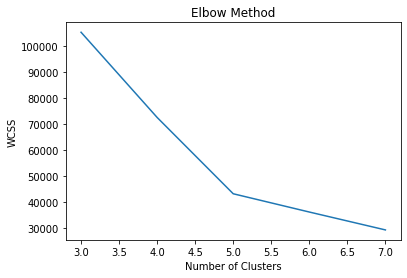

In [11]:
# plotting to find optimal k
plt.plot(k,wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

* We determine the optimal number of clusters by elbow method. In this the we select the number of clusters where the change in Within Cluster Sum of Squares (WCSS) begins to level off

* Here we see that the elbow is at k=5.

## Silhouette Method

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
X = np.array(data)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,  54],
       [ 43,

In [14]:
k=[3,4,5,6,7]
silhouette = []

for num in k:
    print(k)
    kmeans = KMeans(n_clusters=num,init='k-means++',random_state=32)
    labels=kmeans.fit(data).labels_
    Silhouette_Score = silhouette_score(data, labels, metric="euclidean", sample_size=1000, random_state=32)
    print(f"Silhouette score for k= {num} is {Silhouette_Score}")
    silhouette.append(Silhouette_Score)

[3, 4, 5, 6, 7]
Silhouette score for k= 3 is 0.4655929938419976
[3, 4, 5, 6, 7]
Silhouette score for k= 4 is 0.49382317764955086
[3, 4, 5, 6, 7]
Silhouette score for k= 5 is 0.5564284222254647
[3, 4, 5, 6, 7]
Silhouette score for k= 6 is 0.5417265486704322
[3, 4, 5, 6, 7]
Silhouette score for k= 7 is 0.5298456206540598


Text(0, 0.5, 'Silhouette_Score')

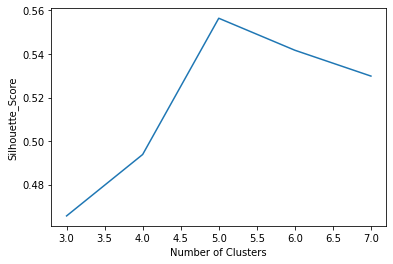

In [15]:
# plotting to find optimal k
plt.plot(k,silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Score")

*  Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

## Hierarchical Clustering

In [16]:
import scipy.cluster.hierarchy as sch

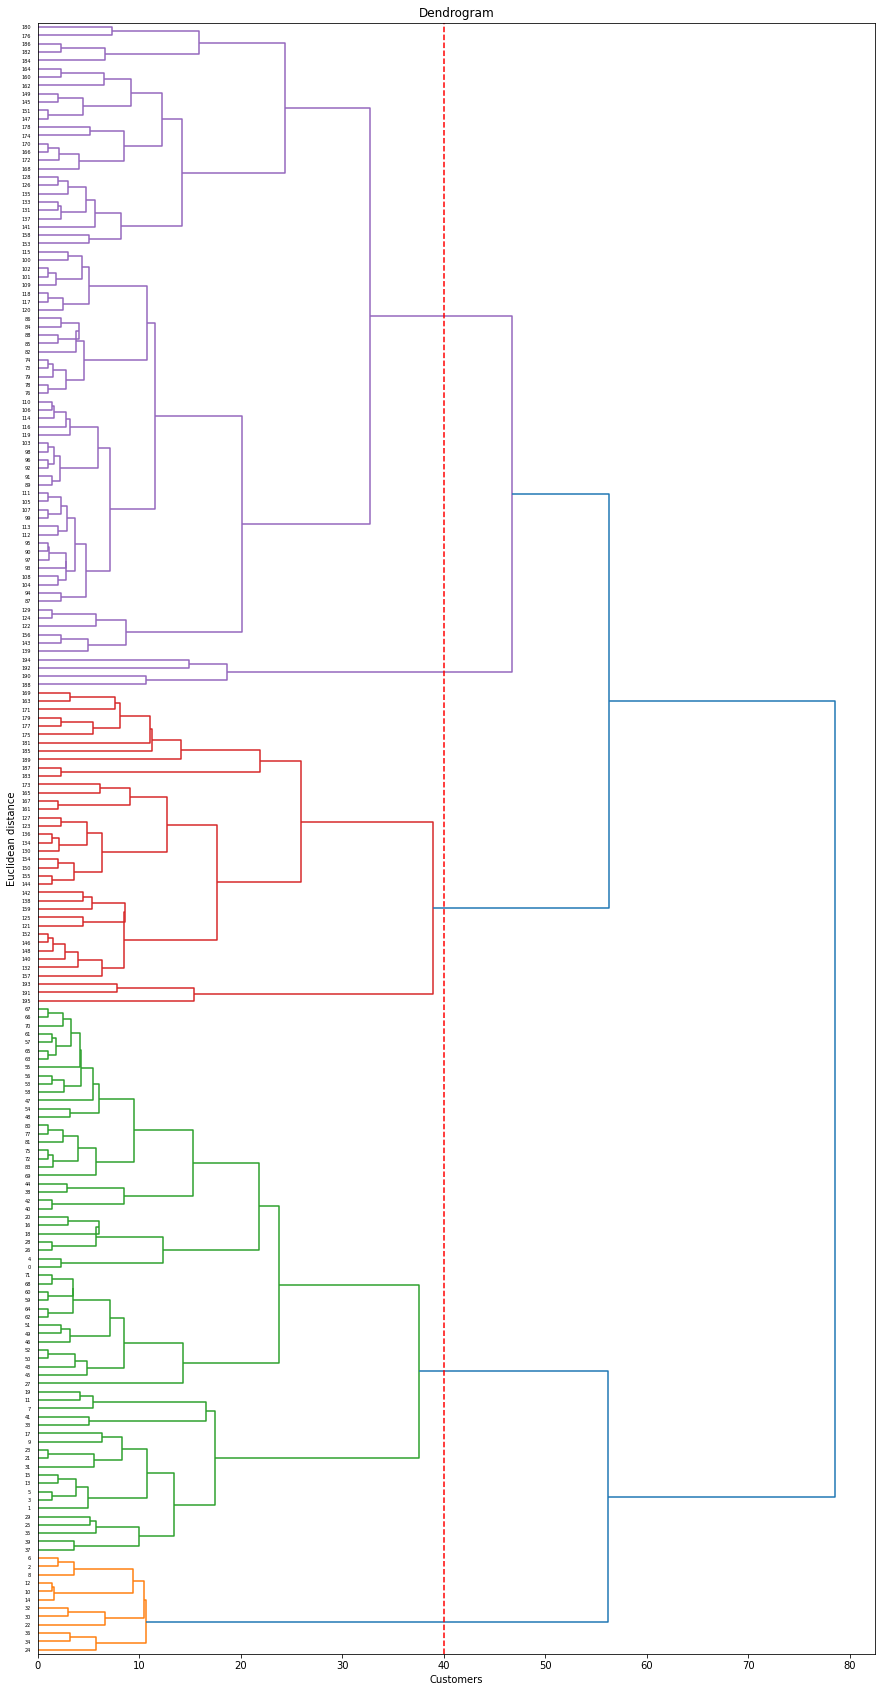

In [17]:
#  using dendrogram
plt.figure(figsize=(15,30))

dendrogrm = sch.dendrogram(sch.linkage(data, method = 'median'),orientation = 'right')
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axvline(40, color='red', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

* To choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

* In this case the no of clusters will be 5

In [18]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward', )#‘ward’ minimizes the variance of the clusters being merged.
y_pred = agc.fit_predict(data)

In [19]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2],
      dtype=int64)

Text(0.5, 1.0, 'After Clustering')

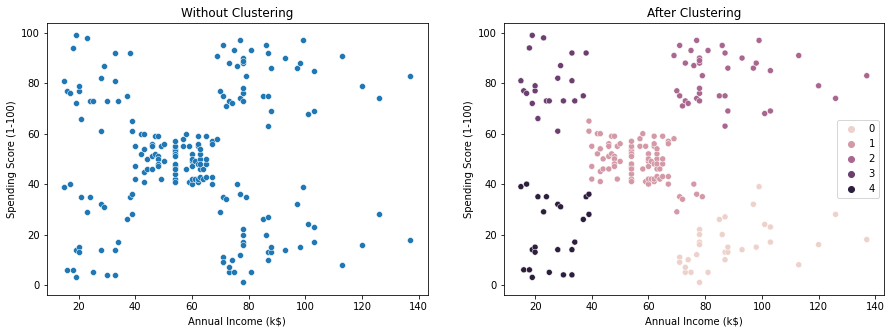

In [20]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=data, x='Annual Income (k$)', y='Spending Score (1-100)').set_title('Without Clustering')
sns.scatterplot(ax=axes[1], data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue=agc.labels_).set_title('After Clustering')

## DBScan

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
db = DBSCAN(eps=5, min_samples=5).fit(X)
db

DBSCAN(eps=5)

In [23]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [24]:
labels = db.labels_

In [25]:
n_clusters_ = n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [26]:
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 5
Estimated number of noise points: 88


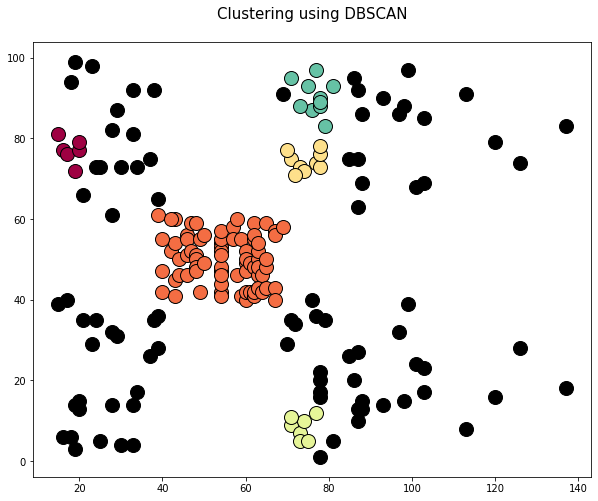

In [27]:
# Plot result
plt.figure(figsize = (10, 8))

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          # creating the list of colours, generating the colourmap
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   # assigning class members for each class
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()

**Conclusion**

* Although the optimal cluster count is 5, the clusters formed are very different.